<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/phiKTransform_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [58]:
phi = np.abs(np.random.normal(0.25,0.05,70000))
swc = np.abs(np.random.normal(0.1,0.01,70000))

k = 8.58102*(phi**(4.4))/(swc**2)

In [59]:
df = pd.DataFrame({'Porosity':phi , 'Swc':swc, 'Permeability(D)':k})

In [60]:
# df[(df['Porosity'] < 0.001) | (df['Swc'] <0.001)]

,Porosity,Swc,Permeability(D)


In [29]:
#

In [19]:
#

In [32]:
# df[df['Swc']<=0]

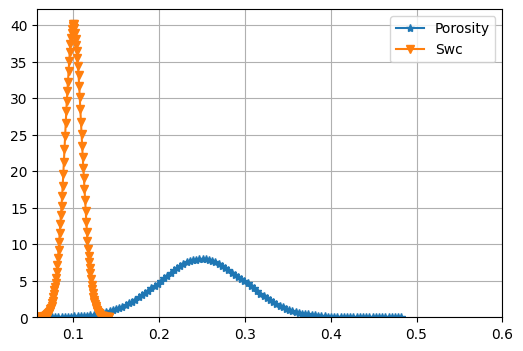

In [91]:
plt.style.use('default')

plt.figure(figsize=(6,4))

sns.kdeplot(df['Porosity'],label='Porosity',marker='*')
sns.kdeplot(df['Swc'],label='Swc',marker='v')

plt.xlim(min(swc), 0.6)

plt.grid()

plt.legend(loc='best')

In [34]:
df.head()

,Porosity,Swc,Permeability(D)
0,0.193891,0.245432,0.104456
1,0.301614,0.113136,3.434996
2,0.267498,0.177913,0.819086
3,0.230059,0.061722,3.505502
4,0.266670,0.211083,0.574006


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
df.columns

X = df[['Porosity', 'Swc']]

y = df['Permeability(D)']

###The commented-out steps are for if you apply a Deep Learning Algorithm.

In [64]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [38]:

# from sklearn.preprocessing import MinMaxScaler

In [39]:
# scaler = MinMaxScaler()

# X_train= scaler.fit_transform(X_train)


# X_test = scaler.transform(X_test)



In [40]:
# X_train.shape

(56000, 2)

In [41]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation
# from tensorflow.keras.optimizers import Adam

In [87]:
# model = Sequential()

# model.add(Dense(2,activation='relu'))
# model.add(Dense(10,activation='relu'))
# model.add(Dense(10,activation='relu'))
# model.add(Dense(1))

# model.compile(optimizer='adam',loss='mse')

In [88]:
# model.fit(x=X_train,y=y_train.values,
#           validation_data=(X_test,y_test.values),
#           batch_size=128,epochs=100)

In [65]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
model = DecisionTreeRegressor(random_state=1)

In [67]:
model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [68]:
X.head()

,Porosity,Swc
0,0.272440,0.104683
1,0.182001,0.107320
2,0.265756,0.107777
3,0.316770,0.086847
4,0.314456,0.089505


In [69]:
print(model.predict(X.head()))

[2.56434333 0.40916949 2.19807738 7.23267175 6.59340329]


In [71]:
from sklearn.metrics import mean_absolute_error

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:

def get_mae(nodes, X_test,y_test,X_train,y_train):
  dt = DecisionTreeRegressor(max_leaf_nodes=nodes)
  dt.fit(X_train,y_train)
  y_p = dt.predict(X_test)
  mae = mean_absolute_error(y_test,y_p)
  return mae

In [75]:
leafs = [10,20,30,40,50,100,120,150,200,300,400,500,1000]
error = []
for x in leafs:
  er = get_mae(x, X_test,y_test,X_train,y_train)
  error.append(er)

Text(0.5, 1.0, 'Error Minimization(Elbow Method)')

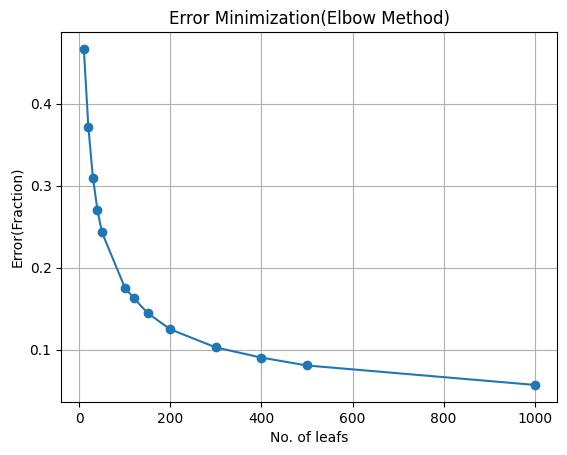

In [86]:
plt.plot(leafs,error,marker='o')
plt.grid()
plt.ylabel('Error(Fraction)')
plt.xlabel('No. of leafs')

plt.title('Error Minimization(Elbow Method)')

In [77]:
X_test.head()

,Porosity,Swc
46730,0.276352,0.089347
48393,0.244388,0.099597
41416,0.137736,0.114371
34506,0.297663,0.119691
43725,0.270696,0.088165


In [78]:
print(model.predict(X_test.head()))

[3.74814537 1.75630554 0.10683635 2.89607962 3.51454559]


In [79]:
print(y_test.head())

46730    3.748145
48393    1.756306
41416    0.106836
34506    2.896080
43725    3.514546
Name: Permeability(D), dtype: float64


In [80]:
y_p = model.predict(X_test)

Text(0, 0.5, 'Actual K values')

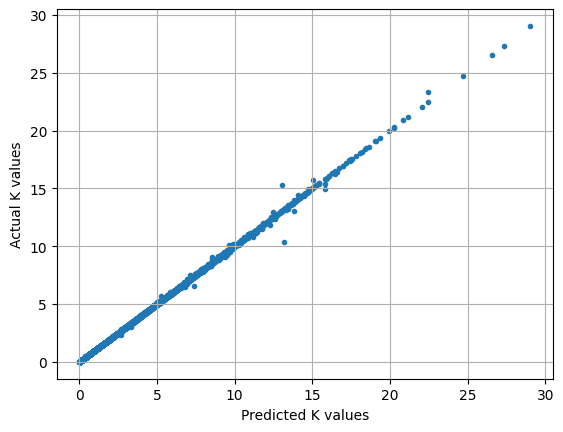

In [84]:
plt.grid()
plt.scatter(y_p,y_test,marker='.')

plt.xlabel('Predicted K values')
plt.ylabel('Actual K values')

In [93]:
from sklearn import metrics
MAE =metrics.mean_absolute_error(y_test,y_p)
MSE = metrics.mean_squared_error(y_test,y_p)
RMSE = np.sqrt(MSE)

evaluation = pd.DataFrame(data =[MAE*100,MSE*100,RMSE*100], index='MAE(%) MSE(%) RMSE(%)'.split(), columns = ['Evaluation Values'])
evaluation

,Evaluation Values
MAE(%),0.378669
MSE(%),0.107336
RMSE(%),3.276219
